<a href="https://colab.research.google.com/github/Andrian0s/ML4NLP1-2024-Tutorial-Notebooks/blob/main/tutorials_notebooks_in_class_2024/03_tutorial_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4NLP1 - Tutorial 3: Introduction to sklearn Pipeline

In this tutorial, we will introduce
* the Pipeline class of sklearn


---

## 1. Data Loading and Inspection

We are still working with the text classification data the 20Newsgroups dataset.



Dataset description: https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset

In [ ]:
import os
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

# set seed for reproducibility
SEED = 42

# For demonstration, we're going to take just a subset of the 20 available categories...
categories = [
    'alt.atheism',
    'soc.religion.christian',
    'comp.graphics',
    'sci.med'
    ]

twenty_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=SEED
)

twenty_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=SEED
)

print(dir(twenty_train))
print(twenty_train.filenames)
print(twenty_train.target_names)

['DESCR', 'data', 'filenames', 'target', 'target_names']
['/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38440'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38479'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20737'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58112'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58578'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58895']
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [ ]:
# For simplicity, we'll convert the sklearn dataset into a Panda's dataframe
train_df = pd.DataFrame({'text': twenty_train.data, 'label': twenty_train.target})
test_df = pd.DataFrame({'text': twenty_test.data, 'label': twenty_test.target})

# Note, this step converts the numerical target labels to their corresponding strings (only for didactic purposes!)
train_df['label'] = train_df['label'].apply(lambda x: twenty_train.target_names[x])
test_df['label'] = test_df['label'].apply(lambda x: twenty_train.target_names[x])

In [ ]:
# Let's take a look at the data. What do you notice?

train_df.info()

print(train_df['label'].value_counts())

train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2257 non-null   object
 1   label   2257 non-null   object
dtypes: object(2)
memory usage: 35.4+ KB
label
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


,text,label
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu>\n...,sci.med


In [ ]:
# Select a random item to inspect
random_instance = train_df.sample(1)

# Print the contents of the 'text' column at index 0 (there is only 1 item)
print('**** INPUT ****')
print(random_instance['text'].iloc[0])

# Print the content of the 'label' column at index 0 (there is only 1 item)
print('*** TARGET ****')
print(random_instance['label'].iloc[0])


**** INPUT ****
From: bebmza@sru001.chvpkh.chevron.com (Beverly M. Zalan)
Subject: Re: Frequent nosebleeds
Reply-To: bebmza@sru001.chvpkh.chevron.com (Beverly M. Zalan)
Organization: chevron
Lines: 24
X-Newsreader: InterCon TCP/Connect II 1.1

In article <1993Apr17.195202.28921@freenet.carleton.ca>, 
ab961@Freenet.carleton.ca (Robert Allison) writes:

> 
> 
> I have between 15 and 25 nosebleeds each week, as a result of a genetic 
> predisposition to weak capillary walls (Osler-Weber-Rendu). 
> Fortunately, each nosebleed is of short duration. 
> 
> Does anyone know of any method to reduce this frequency? My younger 
> brothers each tried a skin transplant (thigh to nose lining), but their 
> nosebleeds soon returned. I've seen a reference to an herb called Rutin 
> that is supposed to help, and I'd like to hear of experiences with it, 
> or other techniques. 
> -- 


My 6 year son is so plagued.  Lots of vaseline up his nose each night seems 
to keep it under control.  But let him get

In [ ]:
# We'll do the same for the test data...

test_df.info()

print(test_df['label'].value_counts())

test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1502 non-null   object
 1   label   1502 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
label
soc.religion.christian    398
sci.med                   396
comp.graphics             389
alt.atheism               319
Name: count, dtype: int64


,text,label
0,From: brian@ucsd.edu (Brian Kantor)\nSubject: ...,sci.med
1,From: rind@enterprise.bih.harvard.edu (David R...,sci.med
2,From: adwright@iastate.edu ()\nSubject: Re: ce...,sci.med
3,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,alt.atheism
4,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,soc.religion.christian
...,...,...
1497,From: andersom@spot.Colorado.EDU (Marc Anderso...,sci.med
1498,From: bj368@cleveland.Freenet.Edu (Mike E. Rom...,sci.med
1499,From: Donald Mackie <Donald_Mackie@med.umich.e...,sci.med
1500,From: abruno@adobe (Andrea Bruno)\nSubject: Re...,sci.med


In [ ]:
# Select a random item to inspect
random_instance = test_df.sample(1)

# Print the contents of the 'text' column at index 0 (there is only 1 item)
print('**** INPUT ****')
print(random_instance['text'].iloc[0])

# Print the contents of the 'label' column at index 0 (there is only 1 item)
print('*** TARGET ****')
print(random_instance['label'].iloc[0])

**** INPUT ****
From: dwilmot@zen.holonet.net (Dick Wilmot)
Subject: Re: Products to handle HDTV moving pircture (180MB/sec)
Nntp-Posting-Host: zen.holonet.net
Organization: HoloNet National Internet Access System: 510-704-1058/modem
Lines: 48

kazsato@twics.co.jp writes:


>Hi,

>I'd like to know if there is any system (CPU + HD array + framebuffer)
>which can play and record HDTV quality moving picture in realtime.

>HDTV has about 6MB/frame, so recording/playing moving picture will need
>about 180MB/sec bandwidth. I'm thinking to treat the raw data.. not
>compressed. 

Finding a disk array that can do 180MB/sec. will be difficult. The fastest
ones I know about are from Maximum Strategy (IBM also sells these). They
can attach HiPPI at up to 144 MB/sec. (64 bit). For these kinds of data
rates you need more than SCSI for connections. Their latest model, the
RAID 5 model Gen 4 only does 90 MB/sec. but I think this may be a
limitation only of the HiPPI channel and that customer needs hav

### 🗒❓ What do you notice about the distribution between train and test splits?

To simplify calls to the data, we'll transform them into a more `sk-learn`-like style.

The result should be a Pandas `series` -- a 1D array with axis labels.

In [ ]:
# Set variable names for inputs and outputs to make things a bit easier.

X_train = train_df.text.to_numpy()
y_train = train_df.label.to_numpy()
X_test = test_df.text.to_numpy()
y_test = test_df.label.to_numpy()

# Check what we got
print(f'Train X is a {type(X_train)} with shape: {X_train.shape}')
print(f'Train Y is a {type(y_train)} with shape: {y_train.shape}')
print(f'Test X is a {type(X_test)} with shape: {X_test.shape}')
print(f'Test Y is a {type(y_test)} with shape: {y_test.shape}')

Train X is a <class 'numpy.ndarray'> with shape: (2257,)
Train Y is a <class 'numpy.ndarray'> with shape: (2257,)
Test X is a <class 'numpy.ndarray'> with shape: (1502,)
Test Y is a <class 'numpy.ndarray'> with shape: (1502,)


---

## 2. Data Preparation

When working with text data, our labels are usually discrete strings

For example, consider the following tasks:

- Sentiment classification: `postive`, `negative`
- Language identification: `en`, `de`, `fr`, `it`
- Language modelling: words in our vocabulary

To convert these into numerical values from 0 to the number of classes - 1, `sk-learn` provides a handy [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#labelencoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialise the LabelEncoder
label_encoder = LabelEncoder()

print(type(y_train))
print(y_train[:4])

# Fit and apply the LabelEncoder
y_train = label_encoder.fit(y_train).transform(y_train) # equivalent to `.fit_transform(y_train)`

print(type(y_train))
print(y_train[:4])

# Don't forget the test labels!
y_test = label_encoder.transform(y_test)


<class 'numpy.ndarray'>
['comp.graphics' 'comp.graphics' 'soc.religion.christian'
 'soc.religion.christian']
<class 'numpy.ndarray'>
[1 1 3 3]


In [ ]:
# Let's start with a basic CountVectorizer
# CountVectorizer converts a collection of text documents to a matrix of token counts
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)  # num_docs x num_words
X_test_counts = count_vect.transform(X_test)

print(f'Train X is a {type(X_train_counts)} with shape: {X_train_counts.shape}')
print(f'Test X is a {type(X_test_counts)} with shape: {X_test_counts.shape}')

Train X is a <class 'scipy.sparse._csr.csr_matrix'> with shape: (2257, 35788)
Test X is a <class 'scipy.sparse._csr.csr_matrix'> with shape: (1502, 35788)


---

## 3. Model Fitting and Development




In [ ]:
from sklearn.svm import LinearSVC

# Initialise an SVM classifier
svc = LinearSVC()

# Fit it on the training data
svc.fit(X_train_counts, y_train)

LinearSVC()


Now that we've fit our model, we're ready to evaluate it, right?

Well, not exactly...

### 🗒❓What is the issue with evaluating on the held-out test set right now?

The common practice is that we train a model and then evaluate it on heldout test data in order to get an idea of how well our model generalises to unseen data - which is of course the goal!

To achieve this, we can simply split the labeled data into train and test splits, as we've done above.

![holdout_test](https://community.alteryx.com/t5/image/serverpage/image-id/71542i222AF143484A2306/image-size/large?v=v2&px=999)


However, machine learning models are highly susceptible to hyperparameters.
In order to be able to determine the best hyperparameters to give our model the best chance of generalising to unseen data, we need a way to evaluate the model under different settings. For this, one option is to use a heldout validation split:

![holdout_val](https://community.alteryx.com/t5/image/serverpage/image-id/71548iB33D10C7233B394A/image-size/large?v=v2&px=999)

### 🗒❓What's the problem with this approach?


To avoid throwing away valuable training data, we can use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance).

For each 'fold', we split we get a new development subset and train on the rest.
The final performance is then the average performance across our `n` folds.

![cross_val](https://community.alteryx.com/t5/image/serverpage/image-id/71553i43D85DE352069CB9/image-size/large?v=v2&px=999)


</br>
</br>

[Image Source](https://community.alteryx.com/t5/Data-Science/Holdouts-and-Cross-Validation-Why-the-Data-Used-to-Evaluate-your/ba-p/448982)

In [ ]:
from sklearn.model_selection import cross_validate

result = cross_validate(svc, X_train_counts, y_train, cv=5)
print(f'CV scores on {len(result["test_score"])} folds: {result["test_score"]}')
print(f'Average CV score: {result["test_score"].mean():.3f}')

CV scores on 5 folds: [0.95132743 0.94469027 0.94900222 0.94456763 0.94900222]
Average CV score: 0.948




That's not bad, but can we do better?

Let's try a TF-IDF vectorizer

In [ ]:

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) # Note, we pass our counts to our TF-IDF vectorizer!
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print(f'Train X is a {type(X_train_tfidf)} with shape: {X_train_tfidf.shape}')
print(f'Test X is a {type(X_test_tfidf)} with shape: {X_test_tfidf.shape}')

Train X is a <class 'scipy.sparse._csr.csr_matrix'> with shape: (2257, 35788)
Test X is a <class 'scipy.sparse._csr.csr_matrix'> with shape: (1502, 35788)


In [ ]:
svc = LinearSVC()
result = cross_validate(svc, X_train_tfidf, y_train, cv=5)
print(f'CV scores on {len(result["test_score"])} folds: {result["test_score"]}')
print(f'Average CV score: {result["test_score"].mean():.3f}')

CV scores on 5 folds: [0.96902655 0.97345133 0.96230599 0.96452328 0.97782705]
Average CV score: 0.969


Now we're cooking with gas!

---

## 3.1 Shortcuts in `sk-learn`:

`sk-learn` allows us to build convenient [`Pipelines`](https://scikit-learn.org/stable/api/sklearn.pipeline.html#module-sklearn.pipeline), which facilitate the management of our data and the training of our models enourmously.

These allow us to chain together the preprocessing steps with our estimator (classifier), which means we can always provide the raw input data as input!

Consider for example:

In [ ]:
from sklearn.pipeline import Pipeline

# Define a pipeline: first vectorize, then tfidf, then classify
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

# Repeat our cross validation.
result = cross_validate(pipe, X_train, y_train, cv=5)
print(f'CV scores on {len(result["test_score"])} folds: {result["test_score"]}')
print(f'Average CV score: {result["test_score"].mean():.3f}')

CV scores on 5 folds: [0.97345133 0.97566372 0.96452328 0.96895787 0.97782705]
Average CV score: 0.972


Quick sanity check:

### 🗒❓ What do we pass into our new `Pipeline` object?


### 🗒❓ What types of ngrams are used here?



### 🗒❓ What type of regularization did we used here? How can we change it?

In [ ]:
pipe.get_params()


{'memory': None,
 'steps': [('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', LinearSVC())],
 'verbose': False,
 'vect': CountVectorizer(),
 'tfidf': TfidfTransformer(),
 'clf': LinearSVC(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': 'auto',
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__loss': 'squared_hinge',
 'clf__max_iter': 1000,
 'clf__multi_class': '

---

## 4. Model selection - find your best model

For every model you would like to train, there is a plethora of parameters you could set.

How to find the best model? Again, sklearn has a solution: [`GridSearchCV`](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search).

With grid search cross validation, you can set your hyperparameter space and train different models with all the parameter combinations.

Keep in mind that depending on how many folds you train, the whole training procedure takes significantly longer.

But let's set up grid search cross validation. We set up a new pipeline for a SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

# Re-initialise the pipe
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

### 🗒❓ Given these GridSearch papameters, how many fitted combinations will we end up with?

In [ ]:
gs_pipe = GridSearchCV(pipe, param_grid, cv=5, verbose=1)
gs_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__loss': ['hinge', 'squared_hinge'],
                         'svc__multi_class': ['ovr', 'crammer_singer'],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [ ]:
# What was the best hyperparameter combination?
print(gs_pipe.best_params_)
# What was the best score average score across all cross validation runs?
print(gs_pipe.best_score_)

{'svc__loss': 'hinge', 'svc__multi_class': 'crammer_singer', 'vect__ngram_range': (1, 1)}
0.9751869003002179


In [ ]:
# We can inspect the grid search results in a dataframe.
svc_df = pd.DataFrame.from_dict(gs_pipe.cv_results_)
svc_df.sort_values(by=["rank_test_score"], inplace=True)
svc_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__loss,param_svc__multi_class,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.772931,0.899211,0.341988,0.229069,hinge,crammer_singer,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",0.975664,0.977876,0.971175,0.971175,0.980044,0.975187,0.003556,1
6,2.409166,1.551952,0.200004,0.073850,squared_hinge,crammer_singer,"(1, 1)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.975664,0.977876,0.971175,0.971175,0.980044,0.975187,0.003556,1
3,8.507115,3.363559,0.508321,0.158202,hinge,crammer_singer,"(1, 2)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",0.977876,0.975664,0.971175,0.973392,0.975610,0.974743,0.002279,3
7,8.278816,4.574274,0.828057,0.479351,squared_hinge,crammer_singer,"(1, 2)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",0.977876,0.975664,0.971175,0.973392,0.975610,0.974743,0.002279,3
0,1.157161,0.229365,0.180919,0.051281,hinge,ovr,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'ov...",0.973451,0.975664,0.968958,0.973392,0.977827,0.973858,0.002946,5


## 5. Final Model Fitting and Evaluation

Now that we have found our best model given the Grid Search over potential hyperparameters, we've determined which combination delivers the best model through cross validation.

Finally, we're ready to evaluate its performance on new, unseen test data!

In [ ]:
# Now, we define a new pipeline object with our best params...
pipe = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])

In [ ]:
# After having fit the model, we get the predictions on our heldout test set
y_pred = pipe.predict(X_test)

### 🗒❓ What is the output?

### 🗒❓ What metrics can we use to analyse performance?

Acc: 0.929


Classification Report:

                        precision    recall  f1-score   support

           alt.atheism      0.951     0.850     0.897       319
         comp.graphics      0.911     0.969     0.939       389
               sci.med      0.960     0.919     0.939       396
soc.religion.christian      0.906     0.965     0.934       398

              accuracy                          0.929      1502
             macro avg      0.932     0.926     0.927      1502
          weighted avg      0.931     0.929     0.929      1502


Confusion Matrix:

[[271   7   9  32]
 [  4 377   4   4]
 [  5  23 364   4]
 [  5   7   2 384]]


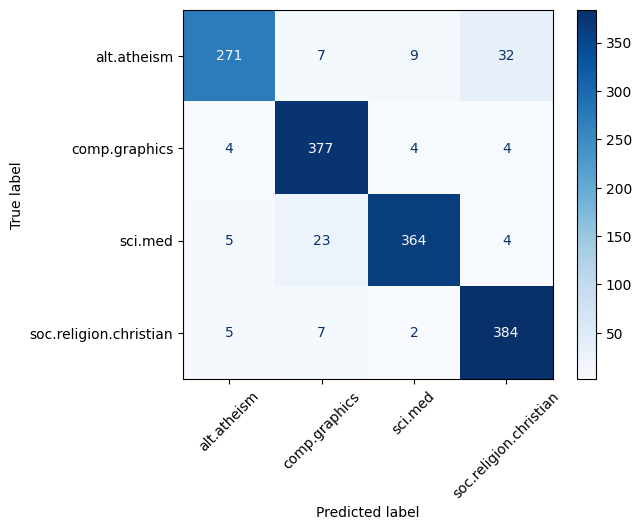

In [ ]:
# Evaluate on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print(f'Acc: {accuracy_score(y_test, y_pred):.3f}\n')

# Classification Report (per class metrics)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=3))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# # show confusion matrix in a simple numerical representation:
print(cm)

# or for more visual rep, plot it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)


---

## 6. Model Interpretability

See notebook `03_tutorial_shap.ipynb`